## **SAKAYO TOADOUM SARI**

### **Data Science & Business Analytics Intern at Spark Foundation**

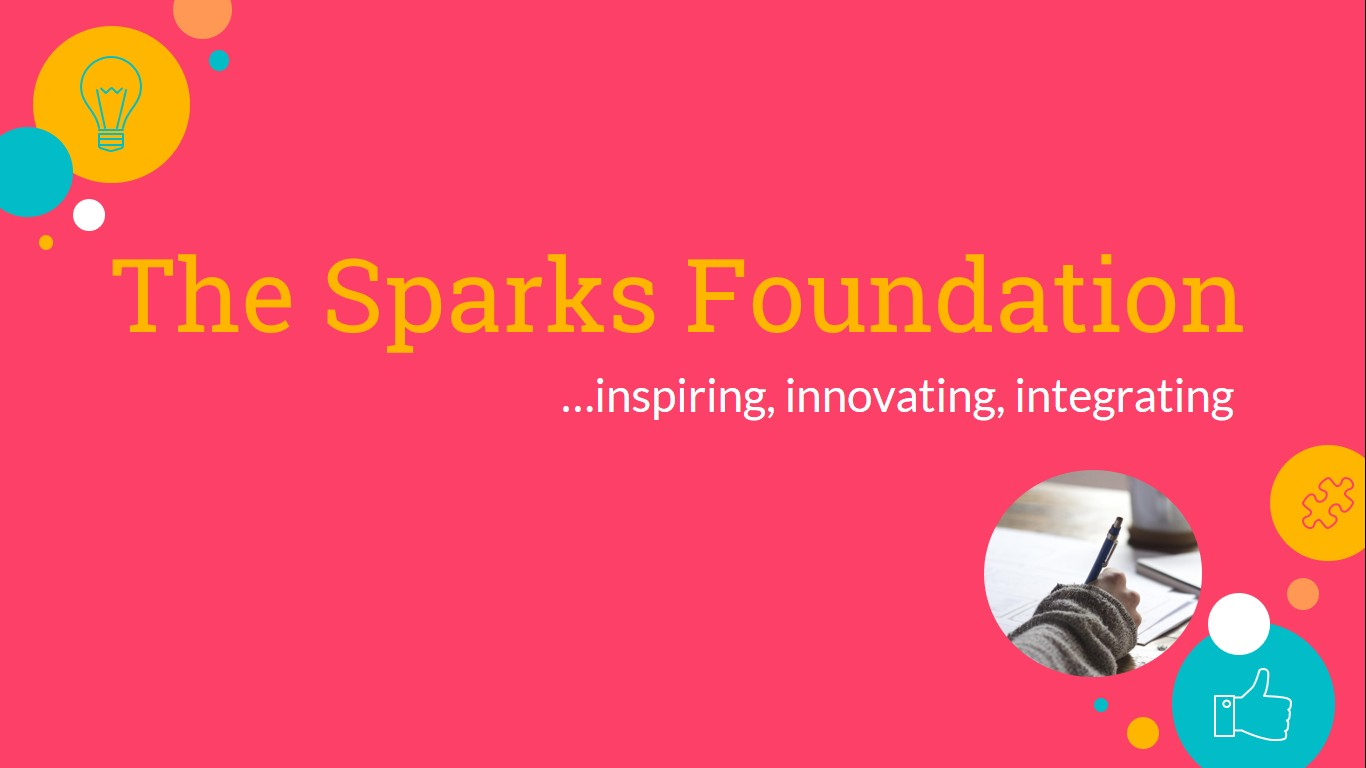

## TASK

### Prediction using unsupervised Machine Learning

### Aim of the project: predict the number of optimum clusters using *Iris dataset*

### **Level: Beginner**



### *1- EDA*

### *2-Dataset for Unsupervised Learning*

### *3-K Means Clustering*

### *4-Finding the number of clusters to get most accurate results (KMeans)*


### *5-Evaluation of the Results*

In [182]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

## **EDA**

In [183]:
df = pd.read_csv("/content/Iris.csv")   # reading the data

In [184]:
df.head()    # first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Id column is not a real feature of our flowers. I will drop it

In [185]:
df.drop(["Id"],axis=1,inplace=True)    # dropped

df.head(3) 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [186]:
df.info()   # all non-null and numeric [except the labels]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [187]:
df.isnull().sum(axis=0)

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [188]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


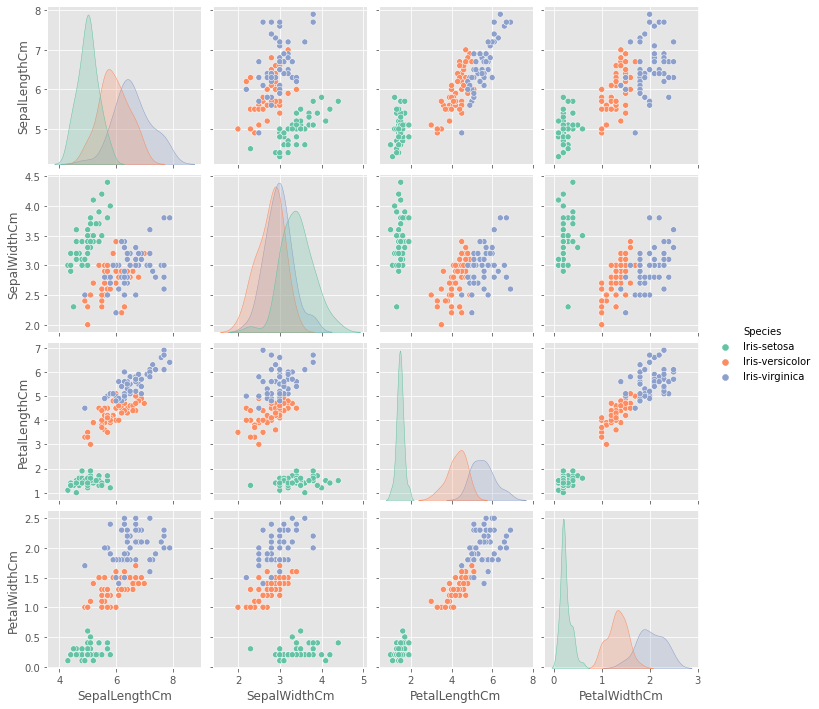

In [189]:
plt.style.use('ggplot')
sns.pairplot(data=df,hue="Species",palette="Set2")
plt.show()

### **Vizualisation with t-SNE**

In [190]:
samples = df.iloc[:, :-1].values
d = {'Iris-setosa':0, 'Iris-versicolor': 1 , 'Iris-virginica':2}
variety_numbers = df['Species'].map(d)

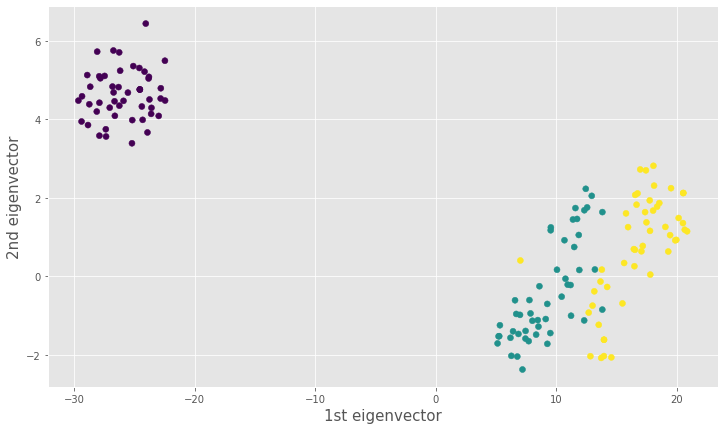

In [201]:
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:, 0]

# Select the 1st feature: ys
ys = tsne_features[:, 1]

# Scatter plot, coloring by variety_numbers
plt.figure(figsize=(12,7))
plt.scatter(xs, ys, c=variety_numbers)
plt.xlabel("1st eigenvector", fontsize=15)
plt.ylabel("2nd eigenvector", fontsize=15)
plt.show()

We see that iris-setosa is easily separable from the other two. 

But our task is to find the Labels that we didn't know at all

We will use the dataset without labels, let'us create then a new dataframe to use.

In [192]:
features = df.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]

Now we don't know the number of classes

### **SciKit-Learn implementation of KMeans**

In [193]:
kmeans = KMeans(n_clusters=50)

Here we don't know the number of class that's why we use the number of cluster randomly.

We will use ELBOW RULE, which is basically looking for a plot line that respectively has a slope nearest to 90 degrees compared to y axis and be smallest possible.

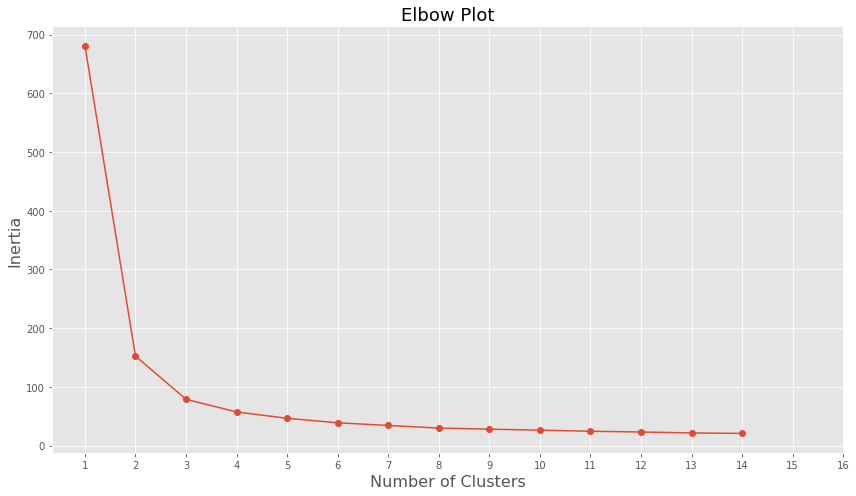

In [194]:
new_list = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)
    new_list.append(kmeans.inertia_)

plt.style.use('ggplot')
plt.figure(figsize=(12,7))
plt.title("Elbow Plot", fontsize=18)
plt.plot(range(1,15),new_list,"-o")
plt.grid(True)
plt.xlabel("Number of Clusters",fontsize=16)
plt.ylabel("Inertia",fontsize=16)
plt.xticks(range(1,17))
plt.tight_layout()
plt.show()


3 or 2 clusters seems to be the best choice using Elbow

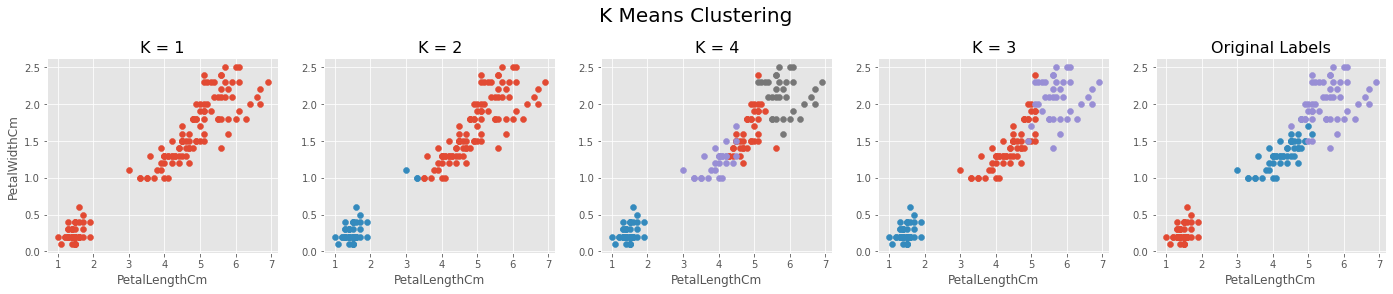

In [202]:
plt.figure(figsize=(24,4))

plt.suptitle("K Means Clustering",fontsize=20)


plt.subplot(1,5,1)
plt.title("K = 1",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.scatter(features.PetalLengthCm,features.PetalWidthCm)


plt.subplot(1,5,2)
plt.title("K = 2",fontsize=16)
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=2)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])

# I drop labels since we only want to use features.
features.drop(["labels"],axis=1,inplace=True)

plt.subplot(1,5,4)
plt.title("K = 3",fontsize=16)
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=3)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])
plt.scatter(features.PetalLengthCm[features.labels == 2],features.PetalWidthCm[features.labels == 2])

# I drop labels since we only want to use features.
features.drop(["labels"],axis=1,inplace=True)

plt.subplot(1,5,3)
plt.title("K = 4",fontsize=16)
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=4)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])
plt.scatter(features.PetalLengthCm[features.labels == 2],features.PetalWidthCm[features.labels == 2])
plt.scatter(features.PetalLengthCm[features.labels == 3],features.PetalWidthCm[features.labels == 3])

# I drop labels since we only want to use features.
features.drop(["labels"],axis=1,inplace=True)

plt.subplot(1,5,5)
plt.title("Original Labels",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.scatter(df.PetalLengthCm[df.Species == "Iris-setosa"],df.PetalWidthCm[df.Species == "Iris-setosa"])
plt.scatter(df.PetalLengthCm[df.Species == "Iris-versicolor"],df.PetalWidthCm[df.Species == "Iris-versicolor"])
plt.scatter(df.PetalLengthCm[df.Species == "Iris-virginica"],df.PetalWidthCm[df.Species == "Iris-virginica"])

plt.subplots_adjust(top=0.8)
plt.show()

Kmeans give a good result with 3 clusters. Except few data points, we can say the prediction is almost identical to the original dataset with labels. Which shows that our ELBOW chart was good.

## Evaluation of our model using Cross tabulation

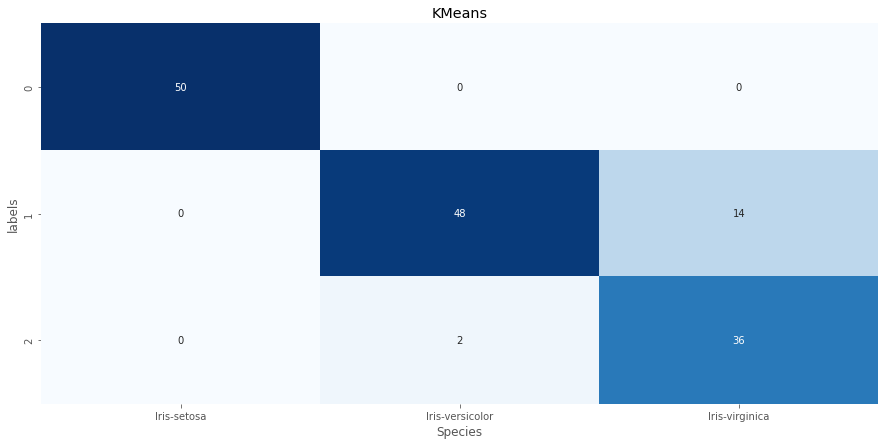

In [196]:
kmeans = KMeans(n_clusters=3)
kmeans_predict = kmeans.fit_predict(features)

# cross tabulation table for kmeans
df1 = pd.DataFrame({'labels':kmeans_predict,"Species":df['Species']})
ct1 = pd.crosstab(df1['labels'],df1['Species'])


plt.figure(figsize=(15,7))
plt.title("KMeans")
sns.heatmap(ct1,annot=True,cbar=False,cmap="Blues")

plt.show()

## **Conclusion**

#### KMeans failed on 16 data points over 150 data points, which is equal to 90%

### We also see that clustering "iris-setosa" is easy because they are easily differentiable our t-SNE plot have shown this

### 14 mistakes out 16 is coming from "iris-virginica". Which shows that it was hard to cluster by KMeans.